In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionResNetV2 as Model
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import MaxPool2D, Conv2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras import Sequential
from keras.layers import Dense,Flatten

from sklearn.metrics import f1_score

In [ ]:
seed = 0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! git clone https://github.com/Peter-TMK/Hamoye_capstone_project_smote.git

fatal: destination path 'Hamoye_capstone_project_smote' already exists and is not an empty directory.


(282, 400, 3)


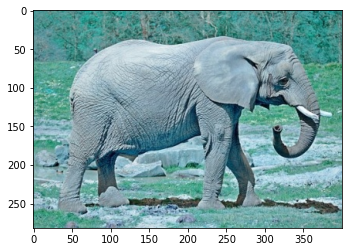

In [ ]:
img = cv2.imread("/content/Hamoye_capstone_project_smote/Data/train/Elephant/Elephant_111.jpg")
plt.imshow(img)
print(img.shape)

(282, 400, 3)
(266, 400, 3)
(266, 400, 3)
(286, 400, 3)
(339, 400, 3)
(266, 400, 3)


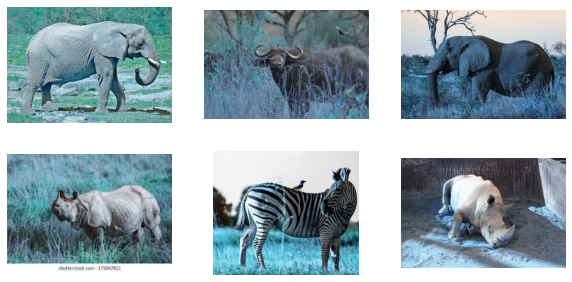

In [ ]:
fig = plt.figure(figsize= (10,5))

img1 = cv2.imread("/content/Hamoye_capstone_project_smote/Data/train/Elephant/Elephant_111.jpg")
img2 = cv2.imread("/content/Hamoye_capstone_project_smote/Data/train/Buffalo/Buffalo_104.jpg")
img3 = cv2.imread("/content/Hamoye_capstone_project_smote/Data/train/Elephant/Elephant_101.jpg")
img4 = cv2.imread("/content/Hamoye_capstone_project_smote/Data/train/Rhino/Rhino_107.jpg")
img5 = cv2.imread("/content/Hamoye_capstone_project_smote/Data/train/Zebra/Zebra_104.jpg")
img6 = cv2.imread("/content/Hamoye_capstone_project_smote/Data/train/Rhino/Rhino_112.jpg")

fig.add_subplot(2,3,1)
plt.imshow(img1)
plt.axis('off')
print(img1.shape)

fig.add_subplot(2,3,2)
plt.imshow(img2)
plt.axis('off')
print(img2.shape)

fig.add_subplot(2,3,3)
plt.imshow(img3)
plt.axis('off')
print(img3.shape)

fig.add_subplot(2,3,4)
plt.imshow(img4)
plt.axis('off')
print(img4.shape)

fig.add_subplot(2,3,5)
plt.imshow(img5)
plt.axis('off')
print(img5.shape)

fig.add_subplot(2,3,6)
plt.imshow(img6)
plt.axis('off')
print(img6.shape)

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = "/content/Hamoye_capstone_project_smote/Data/train"
val_path = "/content/Hamoye_capstone_project_smote/Data/val"
test_path = "/content/Hamoye_capstone_project_smote/Data/test"

In [ ]:
# Use the Image Data Generator to import the images from the dataset

train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [ ]:
training_gen = train_datagen.flow_from_directory(train_path,
            target_size = IMAGE_SIZE,
            batch_size = 32,
            seed = seed,
            shuffle=True,
            class_mode = 'categorical')

validation_gen = test_datagen.flow_from_directory(val_path,
            target_size = IMAGE_SIZE,
            batch_size = 32,
            seed = seed,
            shuffle=True,
            class_mode = 'categorical')

test_gen=test_datagen.flow_from_directory(test_path,
            target_size= IMAGE_SIZE,
            batch_size= 32,
            seed = seed,
            shuffle= False,
            class_mode="categorical")

Found 7556 images belonging to 4 classes.
Found 2160 images belonging to 4 classes.
Found 1084 images belonging to 4 classes.


In [ ]:
# checking for the classes of our label
training_gen.class_indices

{'Buffalo': 0, 'Elephant': 1, 'Rhino': 2, 'Zebra': 3}

In [ ]:
# this represents our test actual values and their classes.
test_gen.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
print(len(test_gen.classes))

1084


In [ ]:
model_ = Model(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
    classes=4,
    classifier_activation='softmax'
)
model_.trainable = False

In [ ]:

np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential([
    model_
])
model.add(Conv2D(512, kernel_size=(1,1), activation='relu'))
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Dropout(0.5))
    
model.add(Conv2D(512, kernel_size=(1,1), activation='relu'))
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Dropout(0.5))
    
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.8))

model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.summary()

learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
model.compile(optimizer = optimizer, 
              loss = tf.keras.losses.CategoricalCrossentropy(), 
              metrics = ["accuracy"])
STEP_SIZE_TRAIN = training_gen.n // training_gen.batch_size
STEP_SIZE_VALID = validation_gen.n // validation_gen.batch_size

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 conv2d_408 (Conv2D)         (None, 5, 5, 512)         786944    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 3, 3, 512)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 3, 3, 512)         0         
                                                                 
 conv2d_409 (Conv2D)         (None, 3, 3, 512)         262656    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 512)       

In [ ]:
# Some callback functions for fine tuning the model

EarlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1, min_delta=1e-4)
ReduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, cooldown=0,
                                                         min_lr=1e-7, verbose=1)
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Colab Notebooks/hamoye/data/model.hdf5',
                                                verbose=1, save_best_only=True, save_weights_only=True, mode='auto')

In [ ]:
# took 31 minutes
history = model.fit(x = training_gen,
          steps_per_epoch = STEP_SIZE_TRAIN,
          validation_data = validation_gen,
          validation_steps = STEP_SIZE_VALID,
          epochs = 10, callbacks=[EarlyStop, ReduceLROnPlateau, Checkpoint])

Epoch 1/10
236/236 [==============================] - ETA: 0s - loss: 1.4962 - accuracy: 0.5743
Epoch 1: val_loss improved from inf to 0.27808, saving model to /content/drive/MyDrive/Colab Notebooks/hamoye/data/model.hdf5
236/236 [==============================] - 178s 698ms/step - loss: 1.4962 - accuracy: 0.5743 - val_loss: 0.2781 - val_accuracy: 0.9515 - lr: 1.0000e-04
Epoch 2/10
236/236 [==============================] - ETA: 0s - loss: 0.3927 - accuracy: 0.8523
Epoch 2: val_loss improved from 0.27808 to 0.10803, saving model to /content/drive/MyDrive/Colab Notebooks/hamoye/data/model.hdf5
236/236 [==============================] - 161s 681ms/step - loss: 0.3927 - accuracy: 0.8523 - val_loss: 0.1080 - val_accuracy: 0.9697 - lr: 1.0000e-04
Epoch 3/10
236/236 [==============================] - ETA: 0s - loss: 0.2062 - accuracy: 0.9288
Epoch 3: val_loss improved from 0.10803 to 0.06447, saving model to /content/drive/MyDrive/Colab Notebooks/hamoye/data/model.hdf5
236/236 [=============

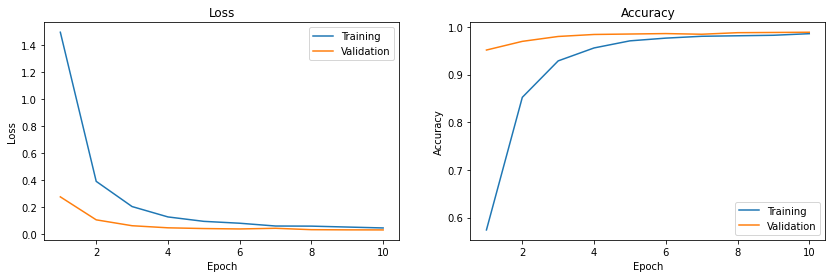

In [ ]:
history = history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['accuracy'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_accuracy'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()

In [ ]:
model.evaluate(test_gen)

34/34 [==============================] - 18s 519ms/step - loss: 0.0377 - accuracy: 0.9880


[0.03765791282057762, 0.9880073666572571]

In [ ]:
# getting the prediction of the model
pred_model = model.predict(test_gen)
pred_model

array([[9.9834692e-01, 3.7470888e-04, 8.9574099e-04, 3.8272151e-04],
       [9.9974078e-01, 5.1095951e-05, 1.4830478e-04, 5.9765367e-05],
       [9.9972385e-01, 3.4090626e-05, 1.9862171e-04, 4.3466232e-05],
       ...,
       [1.4798380e-09, 2.9776992e-10, 4.5126292e-11, 1.0000000e+00],
       [2.6163858e-07, 3.8469839e-08, 1.4967767e-08, 9.9999964e-01],
       [1.9422109e-06, 1.3698775e-06, 1.4839499e-07, 9.9999654e-01]],
      dtype=float32)

In [ ]:
# calculate f1_score --> got 0.9880
y_predict = pred_model.argmax(axis=1)
y_true= test_gen.classes
f1_score(y_true,y_predict,average='macro')

0.9880306623394499

In [ ]:
# save as hdf5 file
model.save("/content/drive/MyDrive/Colab Notebooks/hamoye/data/inceptionResNetV2.hdf5")